In [1]:
# Standard imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk")

# Numpy Review

This is a brief overview of numpy for [DS100](http://ds100.org).  The Jupyter Notebook can be obtained here: [Numpy_Review.ipynb](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.ipynb).

# Importing Numpy

It is customary to import Numpy as `np`:

In [2]:
import numpy as np

As you learned in homework one the `np.array` is the key data structure in numpy for dense arrays of data.

# Creating Arrays

You can build arrays from python lists. 
**Data 8 Compatibility:** In data8 you used a `datascience` package <span class="mark">function called `make_array` which wraps the more standard `np.array` function we will use in this class.</span>

In [3]:
np.array([[1.,2.], [3.,4.]])

array([[1., 2.],
       [3., 4.]])

In [4]:
[x for x in range(5)]     # 定义 0 to 4 的 list

[0, 1, 2, 3, 4]

In [5]:
np.array([x for x in range(5)])

array([0, 1, 2, 3, 4])

Array's don't have to contain numbers:

In [6]:
# 可包含 string
np.array([["A", "matrix"], ["of", "words."]])

array([['A', 'matrix'],
       ['of', 'words.']], dtype='<U6')

## Making Arrays of Zeros

In [7]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

## Making Arrays of Ones

In [8]:
np.ones([3,2])

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [9]:
# 单位阵
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Making Arrays from ranges:

The `np.arange(start, stop, step)` function is like the python `range` function.

In [10]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

You can make a range of other types as well:

In [41]:
date1 = np.datetime64('2022-12-31')
date2 = np.datetime64('2077-01-01')
delta = date2 - date1
print(delta)
a = np.timedelta64(1,'W') / np.timedelta64(1,'D')  # 这下便乘 float 了`
print(type(a))
delta, a

19725 days
<class 'numpy.float64'>


(numpy.timedelta64(19725,'D'), 7.0)

In [12]:
# np.datetime

np.arange(np.datetime64('2016-12-31'), np.datetime64('2017-02-01'))

array(['2016-12-31', '2017-01-01', '2017-01-02', '2017-01-03',
       '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
       '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11',
       '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15',
       '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23',
       '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
       '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31'],
      dtype='datetime64[D]')

## Interpolating numbers 

The `linspace(start,end,num)` function generates `num` numbers evenly spaced between the `start` and `end`.

In [13]:
# 包含了 start and end
np.linspace(0, 5, 10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

Learn more about working with [datetime objects](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html#).

## A random array 

You can also generate arrays of random numbers (we will cover this in greater detail later).

- `randn` generates random numbers from a Normal(mean=0, var=1) distribution.
- `rand` generates random numbers from a Uniform(low=0, high=1) distribution.
- `permutation` generates a random permutation of a sequence of numbers.

In [14]:
np.random.randn(3,2)            # 3 行 2 列, 每个元素服从正态分布 N(0, 1)

array([[-0.46779901, -0.02169607],
       [ 0.50418309,  0.33091517],
       [ 0.02039737,  0.67304471]])

In [15]:
np.random.rand(3,2)             # 3 行 2 列， 每个元素服从均匀分布 U(0, 1)

array([[0.21952521, 0.60796332],
       [0.35802471, 0.84288569],
       [0.25547358, 0.73638994]])

In [16]:
np.random.permutation(range(0,10))    # 0 到 9 随机排列而成的 array

array([4, 9, 7, 3, 2, 5, 6, 1, 8, 0])


# Properties of Arrays

## Shape

Arrays have a shape which corresponds to the number of rows, columns, fibers, ...

In [17]:
A = np.array([[1., 2., 3.], [4., 5., 6.]])
print(A)
A.shape

[[1. 2. 3.]
 [4. 5. 6.]]


(2, 3)

In [18]:
print(np.shape(A))
print(np.size(A))

(2, 3)
6


## Type

Arrays have a type which corresponds to the type of data they contain

- 访问属性 `dtype`

In [19]:
A.dtype

dtype('float64')

In [20]:
np.arange(1,5).dtype

dtype('int64')

In [21]:
(np.array([True, False])).dtype

dtype('bool')

In [22]:
np.array(["Hello", "Worlddddd!"]).dtype

dtype('<U10')

What does `<U6` mean?

- `<` Little Endian
- `U` Unicode
- `6` <span class="mark">length of longest string</span>

#### and we can change the type of an array:

- 使用 method `astype()`

In [23]:
np.array([1,2,3]).astype(float)

array([1., 2., 3.])

In [24]:
np.array(["1","2","3"]).astype(int)

array([1, 2, 3])

In [25]:
np.array([1, 1, 4]).astype(np.cdouble)     # 复数还有 csingle, clongdouble

array([1.+0.j, 1.+0.j, 4.+0.j])

Learn more about numpy [array types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

## Polymorphism 

Can an array have more than one type?

In [26]:
np.array([1,2,3, "cat", True])       # 便乘了 string

array(['1', '2', '3', 'cat', 'True'], dtype='<U21')

Does the following command work:
```python
x = np.array([1,2,3,4])
x[3] = "cat"
```

In [27]:
x = np.array([1,2,3,4])
# x[3] = "cat" # <-- uncomment this line to find out
# ↑ 不能润


# Jagged Arrays (锯齿状)

Is the following valid?

```python
A = np.array([[1, 2, 3], [4, 5], [6]])
```

In [28]:
A = np.array([[1, 2, 3], [4, 5], [6]])
A

/var/folders/zb/ytk3hkr95_q7_271yqn47bsr0000gn/T/ipykernel_82419/4248273399.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.array([[1, 2, 3], [4, 5], [6]])


array([list([1, 2, 3]), list([4, 5]), list([6])], dtype=object)

What happened? 

In [29]:
A.shape

(3,)

In [30]:
print(A.dtype)

object


In [31]:
print(A[0])
print(A[1])
print(A[2])
print(A[1][1])  # 不可写为 A[1, 1]

AA = np.array([[1,1,4], [5,1,4]])
print(AA[1, 1])
print(AA[1][2])

[1, 2, 3]
[4, 5]
[6]
5
1
4


### Issues with Jagged Arrays

 <img src="http://csharpcorner.mindcrackerinc.netdna-cdn.com/UploadFile/955025/C-Sharp-interview-question-part2/Images/jagged%20array.png">

### Jagged arrays can be problematic:

1. Difficult to index (extract columns).
```python
A[0,1] 
 > Error
A[0][1] 
 > 2
```
1. <span class="mark">Not as efficiently represented in contiguous memory.</span>

# Reshaping

Often you will need to reshape matrices.  Suppose you have the following array:

In [32]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**What will the following produce:**

```python
np.arange(1,13).reshape(4,3)
```

**Option A:** (√)

```python
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])
```

**Option B:** (×)

```python
array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])
```

**Solution**

In [33]:
A = np.arange(1,13).reshape(4,3)      # 先填完一行
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [34]:
B = np.arange(1, 13).reshape(2, 3, 2)
B

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

## Flatting Matrix (展平)

Flattening a matrix (higher dimensional array) produces a one dimensional array.

In [35]:
A.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [36]:
B.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Advanced: Array representation

<span class="mark">Numpy stores data contiguously in memory</span>

In [37]:
print(A)
print(A.dtype)
A.data.tobytes()

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
int64


b'\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00'

<span class="mark">Numpy stores matrices in _row-major_ order (by rows)</span>

In [38]:
print(np.arange(1,13).reshape(4,3, order='C'))         # 默认是 'C' (按行)
print()
print(np.arange(1,13).reshape(4,3, order='F'))         # 也可指定 'F' (按列)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


What does the `'F'` mean?

**F**ortran ordering.  In BLAS libraries are specified for Fortran and C programming languages which differ both in the column (Fortran) or row (C) indexing.

# Slicing

From homework 1 you should already be pretty good at Slicing so let's test your slicing knowledge.

<img src="guessing_game.png" width="600px">

* **Program 1:**
```python
x[:, 0]
```
<details>
<summary>**Answer**</summary>
<p>B</p>
</details>

<br/>

* **Program 2:**
```python
x[0, :]
```
<details>
<summary>**Answer**</summary>
<p>A</p>
</details>

<br/>

* **Program 3:**
```python
x[:2, 1:]
```
<details>
<summary>**Answer**</summary>
<p>H</p>
</details>

<br/>

* **Program 4:**
```python
x[0::2, :]
```
<details>
<summary>**Answer**</summary>
<p>D</p>
</details>



<img src="guessing_game.png" width="600px">


Understanding <span class="mark">the slice syntax</span>

```python
begin:end:stride
```


In [39]:
a = [0, 1, 2, 3, 4, 5, 6]
print(a[:2])     # 取不到 2
print(a[1:-1])   # 取不到 -1
print(a[1:])     # 取到 -1
print(a[0::2])
print(a[1:4:2])
print(a[1:-2:3])

[0, 1]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[0, 2, 4, 6]
[1, 3]
[1, 4]


## Modifying a Slice

Suppose I wanted to make all entries in my matrix 0 in the top right corner as in (H) above.

In [42]:
H = np.arange(1,13).reshape(4,3)
print("Before:\n", H)

Before:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [43]:
H[:2, 1:] = 0
print("After:\n", H)

After:
 [[ 1  0  0]
 [ 4  0  0]
 [ 7  8  9]
 [10 11 12]]


# Boolean Indexing

We can apply boolean operations to arrays.  This is essential when trying to select and modify individual elements.


**Question:** *Given the following definition of A:*

```python
[[   1.    2.    3.]
 [   4.    5. -999.]
 [   7.    8.    9.]
 [  10. -999. -999.]]
```

*what will the following output:*
```python
A > 3
```


- **Option A:**

```python
False
```

- **Option B:** (√)

```python
array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True, False, False]], dtype=bool)
```

In [44]:
A = np.array([[  1.,   2.,   3.],
       [  4.,   5.,   -999.0],
       [  7.,   8.,   9.],
       [ 10.,  -999.0,  -999.0]])

A > 3.

array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True, False, False]])

**Question:** *What will the following output*
```python
A = np.array([[   1.,    2.,    3.],
       [   4.,    5., -999.],
       [   7.,    8.,    9.],
       [  10., -999., -999.]])

A[A > 3]
```


- **Option A:**

```python
array([ 4,  7, 10,  5,  8, 11,  6,  9, 12])
```

- **Option B:** （√）

```python
array([  4.,   5.,   7.,   8.,   9.,  10.])
```


- **Option C:**

```python
array([[  nan,   nan,  nan],
       [  4.,    5.,   nan],
       [  7.,    8.,   9.],
       [ 10.,    nan,  nan]])
```

In [45]:
A = np.array([[  1.,   2.,   3.],
       [  4.,   5.,   -999.0],
       [  7.,   8.,   9.],
       [ 10.,  -999.0,  -999.0]])

A[A > 3] 

array([ 4.,  5.,  7.,  8.,  9., 10.])

**Question:** *Replace the -999.0 entries with `np.nan`.*

```python
array([[   1.,    2.,    3.],
       [   4.,    5., -999.],
       [   7.,    8.,    9.],
       [  10., -999., -999.]])
```

**Solution**

In [46]:
A = np.array([[  1.,   2.,   3.],
       [  4.,   5.,   -999.0],
       [  7.,   8.,   9.],
       [ 10.,  -999.0,  -999.0]])

* Construct a boolean array that indicates where the value is 999.0:

In [47]:
ind = (A == -999.0)
print(ind)

[[False False False]
 [False False  True]
 [False False False]
 [False  True  True]]


* Assign `np.nan` to all the `True` entires:

In [48]:
A[ind] = np.nan
A

array([[ 1.,  2.,  3.],
       [ 4.,  5., nan],
       [ 7.,  8.,  9.],
       [10., nan, nan]])

**Question:** *What might -999.0 represent?  Why might I want to replace the -999.0 with a `np.nan`?  *

**Solution:** It could be safer in calculations.  For example when computing the mean of the transformed A we get:

In [49]:
print(A)
np.mean(A)

[[ 1.  2.  3.]
 [ 4.  5. nan]
 [ 7.  8.  9.]
 [10. nan nan]]


nan

Perhaps instead we want:

In [50]:
np.nanmean(A)

5.444444444444445

In [51]:
help(np.nanmean)

Help on function nanmean in module numpy:

nanmean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)
    Compute the arithmetic mean along the specified axis, ignoring NaNs.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    For all-NaN slices, NaN is returned and a `RuntimeWarning` is raised.
    
    .. versionadded:: 1.8.0
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the means are computed. The default is to compute
        the mean of the flattened array.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs, the default
        is `fl

In [70]:
A = np.array([1, 1, 4, 5, 1, 4, 1919810])
print(A)
print(A[A > 4])
A = A.astype(float)
A[A > 5] = np.nan
print(A)
print(np.nanmean(A))   # ignore 掉 nan
np.mean(A[:-1])

[      1       1       4       5       1       4 1919810]
[      5 1919810]
[ 1.  1.  4.  5.  1.  4. nan]
2.6666666666666665


2.6666666666666665

# More Complex Bit Logic

Often we will want to work with multiple different arrays at once and select subsets of entries from each array.  Consider the following example:

In [73]:
names = np.array(["Joey", "Henry", "Joseph", 
                  "Jim", "Sam", "Deb", "Mike", 
                  "Bin", "Joe", "Andrew", "Bob"])

favorite_number = np.arange(len(names)) 
favorite_number

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Suppose a subset of these people are staff members:

In [74]:
staff = ["Joey",  "Deb", "Sam"]
staff

['Joey', 'Deb', 'Sam']

### Question:
*How could we compute the sum of the staff members favorite numbers?*

One solution is to use for loops:

In [79]:
print("Bob" in staff)
print("Deb" in staff)

False
True


In [75]:
total = 0 
for i in range(len(names)):
    if names[i] in staff:
        total += favorite_number[i]

print("total:", total)

total: 9


Another solution would be to <span class="mark">use the [np.in1d](https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html) function to determine which people are staff.</span>

> `np.in1d()`: Test whether each element of a 1-D array is also present in a second array.
>
> ```python
> numpy.in1d(ar1, ar2, assume_unique=False, invert=False)
> ```


In [81]:
is_staff = np.in1d(names, staff)
is_staff

array([ True, False, False, False,  True,  True, False, False, False,
       False, False])

Boolean indexing

In [83]:
print(favorite_number[is_staff])
favorite_number[is_staff].sum()

[0 4 5]


9

### Question:
*What does the following expression compute:*

```python
starts_with_j = np.char.startswith(names, "J")
starts_with_j[is_staff].mean()
```

The fraction of the staff have names that begin with `J`?

In [87]:
starts_with_j = np.char.startswith(names, "J")

print(names)
print(starts_with_j)
print(staff)
print(starts_with_j[is_staff])

starts_with_j[is_staff].mean()

['Joey' 'Henry' 'Joseph' 'Jim' 'Sam' 'Deb' 'Mike' 'Bin' 'Joe' 'Andrew'
 'Bob']
[ True False  True  True False False False False  True False False]
['Joey', 'Deb', 'Sam']
[ True False False]


0.3333333333333333

In [107]:
np.mean(
    np.char.startswith(staff, 'J')
)

0.3333333333333333

### Question:
*What does it mean to take the mean of an array of booleans?*

<span class="mark">The values `True` and `False` correspond to the integers `1` and `0` and are treated as such in mathematical expressions (e.g., `mean()`, `sum()`, as well as linear algebraic operations).</span>

### Question
*What does the following expression compute:*

```python
favorite_number[starts_with_j & is_staff].sum()
```

The sum of the favorite numbers of staff starting with `J`

In [111]:
print(starts_with_j)
print(is_staff)
print(starts_with_j & is_staff)
favorite_number

[ True False  True  True False False False False  True False False]
[ True False False False  True  True False False False False False]
[ True False False False False False False False False False False]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [112]:
favorite_number[starts_with_j & is_staff].sum()

0

## Other Useful Operations

* [`choose()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.choose.html)
* [`where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)



# A Note on using Array operations

In [113]:
data = np.random.rand(1000000)

Consider the following two programs.  


### Program A
```python
s = 0
c = 0
for x in data:
    if x > 0.5:
        s += x
        c += 1
result = s/c
```

### Program B
```python
result = data[data > 0.5].mean()
```

1. What do they do?
1. Which one is faster?
1. Which one is clearer?

---

<br/><br/><br/><br/><br/>

### Solution (cool!)

In [114]:
%%timeit
s = 0
for x in data:
    if x > 0.5:
        s += x
result = s/len(data)

143 ms ± 3.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [115]:
%%timeit
result = data[data > 0.5].mean()

5.32 ms ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [125]:
s = 0
c = 0
for x in data:
    if x > 0.5:
        s += x
        c += 1
result = s/c
result

0.7502942953073718

In [126]:
result = data[data > 0.5].mean()
result

0.7502942953073618

## Important Points

<span class="mark">Using the array abstractions instead of looping</span> can often be:

1. Clearer
2. Faster

These are fundamental goals of abstraction. 

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


# Mathematical operations:

Numpy arrays support standard mathematical operations

In [127]:
A = np.arange(1., 13.).reshape(4,3)
print(A)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [128]:
A * 0.5 + 3                # elementwise

array([[3.5, 4. , 4.5],
       [5. , 5.5, 6. ],
       [6.5, 7. , 7.5],
       [8. , 8.5, 9. ]])

notice that operations are element wise.

In [129]:
A.T

array([[ 1.,  4.,  7., 10.],
       [ 2.,  5.,  8., 11.],
       [ 3.,  6.,  9., 12.]])

In [130]:
A.sum()

78.0

In [131]:
A.mean()

6.5

<br/>
<br/>
<br/>




## Be Careful with Floating Point Numbers

What is the value of the following:
$$
A - \exp \left( \log \left( A \right) \right)
$$

<br/>
<br/>
<br/>

**Solution:**


In [133]:
A = np.arange(1., 13.).reshape(4,3)
print(A)

(A - np.exp(np.log(A)))           # elementwise

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


array([[ 0.00000000e+00,  0.00000000e+00, -4.44089210e-16],
       [ 0.00000000e+00,  8.88178420e-16,  0.00000000e+00],
       [ 8.88178420e-16,  1.77635684e-15, -1.77635684e-15],
       [-1.77635684e-15, -1.77635684e-15,  0.00000000e+00]])

**What happened?!**

<span class="mark">Floating point precision is not perfect</span> and we are applying transcendental functions.

<br/><br/><br/><br/>
### A simpler examples

What is the value of the following expression:

```python
0.1 + 0.2 == 0.3
```

In [134]:
0.1 + 0.2 == 0.3

False

In [135]:
print(0.1 + 0.2)

0.30000000000000004


<span class="mark">For these situations consider using `np.isclose`:</span>

In [136]:
help(np.isclose)

Help on function isclose in module numpy:

isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
    Returns a boolean array where two arrays are element-wise equal within a
    tolerance.
    
    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.
    
    .. warning:: The default `atol` is not appropriate for comparing numbers
                 that are much smaller than one (see Notes).
    
    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
        considered equal to NaN's in `b` in the output array.
    
    Returns
    -------


In [138]:
np.isclose(A, np.exp(np.log(A)))

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

<br/>
<br/>
<br/>
<br/>


## Aggregating along an axis 

<img src="axis_plot.png" width="300px">

### Grouping by row:

In [139]:
A.sum(axis=0)

array([22., 26., 30.])

This is the same as:
```python
(nrow, ncols) = A.shape

s = np.zeros(ncols)

for i in range(nrows):
    s += A[i,:]

print(s)
```

### Grouping by col:

In [140]:
A.sum(axis=1)

array([ 6., 15., 24., 33.])

This is the same as:
```python
(nrows, ncols) = A.shape

s = np.zeros(nrows)

for i in range(ncols):
    s += A[:,i]

print(s)
```

## Other Functions to Checkout

* [`mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) computes the mean 
* [`std`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) standard deviation
* [`var`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) variance

and [many more](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations)

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



# Linear Algebra

Suppose we wanted to use linear algebra to compute the sum along axis 1

---

$$ \texttt{A.sum( axis = 1) } = \sum_j A_{i,j} = \begin{bmatrix} 1 & 2 & 3 \\
 4 & 5 & 6\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix} $$

### Will the following work?

```python
b = np.ones(3)
A * b
```

---

<br/><br/><br/><br/><br/>

#### Solution

In [141]:
A = np.array([[1, 2, 3], [4, 5, 6]])
b = np.ones(3)
A * b

array([[1., 2., 3.],
       [4., 5., 6.]])


<br/>
<br/>
<br/>
<br/>
---

**Explanation:**

We ended up computing an element-wise product.  The vector of ones was replicated once for each row and then used to scale the entire row.

<img src="broadcast_equation.png" width="300px"/>

---

### The correct expression for matrix multiplication

In [142]:
A.dot(b)

array([ 6., 15.])

In the later python versions (>3.5) you can use the infix operator `@` which is probably easier to read

In [143]:
A @ b              # 左乘 A, b 作为列向量

array([ 6., 15.])

In [149]:
print(b)
print(A)

[1. 1. 1.]
[[1 2 3]
 [4 5 6]]


In [150]:
b.dot(A.T)     # 右乘 A, b 作为行向量

array([ 6., 15.])

In [151]:
b @ (A.T)

array([ 6., 15.])

---



<br/><br/><br/><br/><br/><br/>


# Solving Linear Systems

Suppose you are asked to solve the following system of linear equations:

$$
5x - 3y = 2 \\
-9x + 2y = -7
$$

this means that we want to solve the following linear systems:

$$
\begin{bmatrix}
5 & -3 \\ -9 & 2
\end{bmatrix} 
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
\begin{bmatrix}
2 \\ -7
\end{bmatrix}
$$

Solving for $x$ and $y$ we get:

$$
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
\begin{bmatrix}
5 & -3 \\ -9 & 2
\end{bmatrix}^{-1}
\begin{bmatrix}
2 \\ -7
\end{bmatrix}
$$



This can be solved numerically using NumPy:

In [152]:
A = np.array([[5, -3], [-9, 2]])
b = np.array([2,-7])

In [153]:
from numpy.linalg import inv
inv(A) @ b

array([1., 1.])

In [154]:
np.linalg.inv(A) @ b

array([1., 1.])

Preferred way to solve (more numerically stable)

In [155]:
from numpy.linalg import solve
solve(A, b)

array([1., 1.])

In [157]:
np.linalg.solve(A, b)

array([1., 1.])

Two points:

1. Issue with performance
1. Issue with numerical stability 

When the matrix is not full rank it may be necessary to use [lstsq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq).

超定的时候, `np.linalg.lstsq(A, b)` 解的是
$$
    A^TAx = A^Tb
$$


In [163]:
np.linalg.lstsq(
    np.array([[0,1], [1,1], [2,1]]),
    np.array([0, 2, 2]),
    rcond=None
)[0]

array([1.        , 0.33333333])

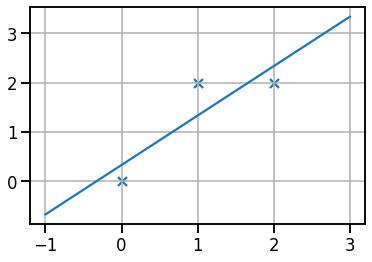

In [171]:
plt.figure()
plt.scatter([0,1,2], [0,2,2], marker='x')
x = np.arange(-1, 4)
y = x + 1/3
plt.plot(x, y)
plt.grid()
plt.show()

In [172]:
# help(plt.scatter)